In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv("/Users/priyanshiranawat/Loan-Predictions/LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [12]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Outliers detection and handling

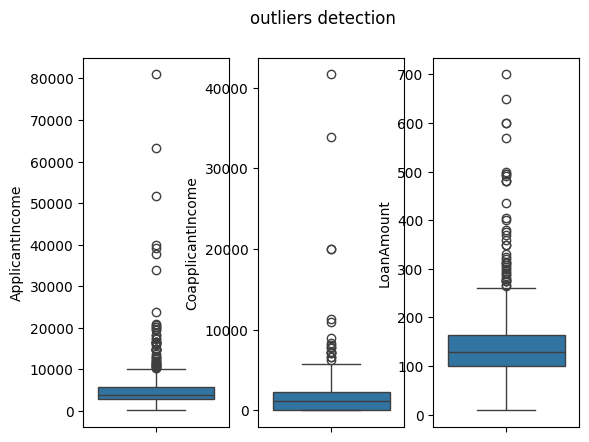

In [15]:
plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("outliers detection")
plt.show()


In [21]:
print("Before removing outliers",data.shape)
data = data[data['ApplicantIncome']<25000]
print("After removing outliers",data.shape)


Before removing outliers (603, 13)
After removing outliers (603, 13)


In [22]:
print("Before removing outliers",data.shape)
data = data[data['CoapplicantIncome']<12000]
print("After removing outliers",data.shape)

Before removing outliers (603, 13)
After removing outliers (603, 13)


In [23]:
print("Before removing outliers",data.shape)
data = data[data['LoanAmount']<400]
print("After removing outliers",data.shape)

Before removing outliers (603, 13)
After removing outliers (591, 13)


#Analysis

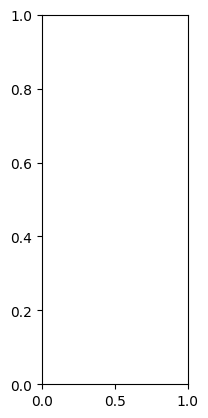

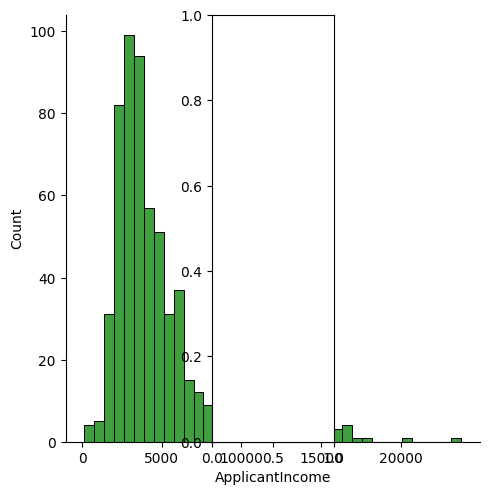

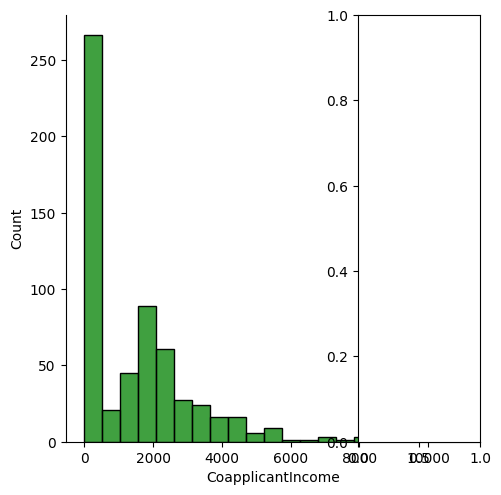

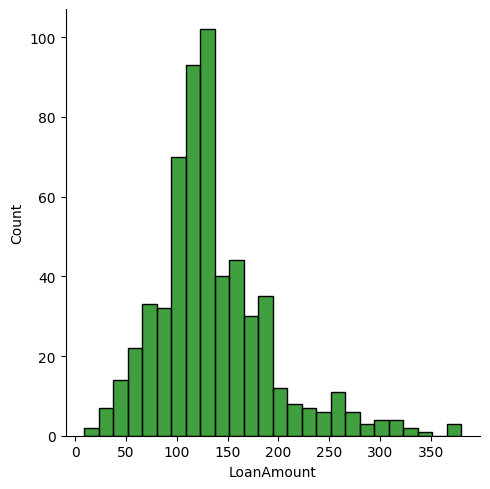

In [28]:
plt.subplot(1,3,1)
sns.displot(data['ApplicantIncome'],color='green')
plt.subplot(1,3,2)
sns.displot(data['CoapplicantIncome'],color='green')
plt.subplot(1,3,3)
sns.displot(data['LoanAmount'],color='green')


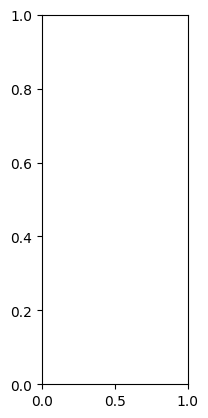

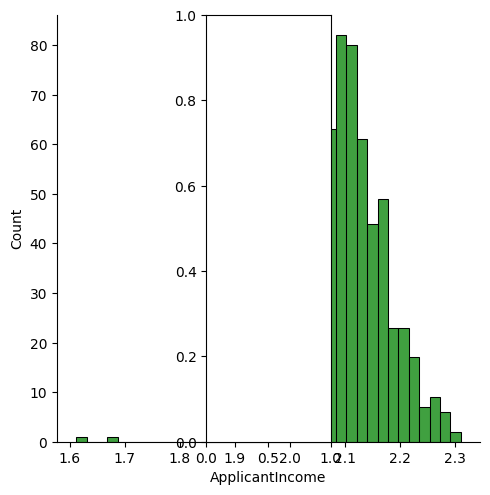

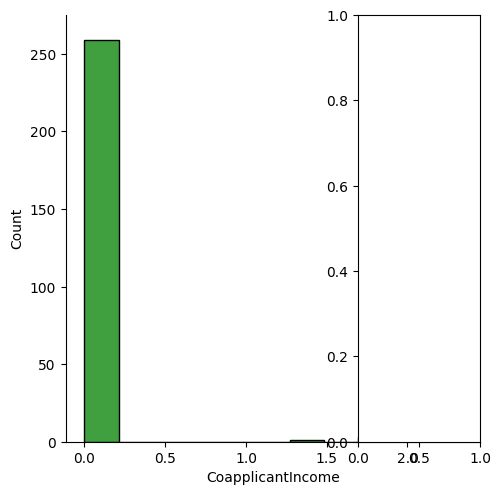

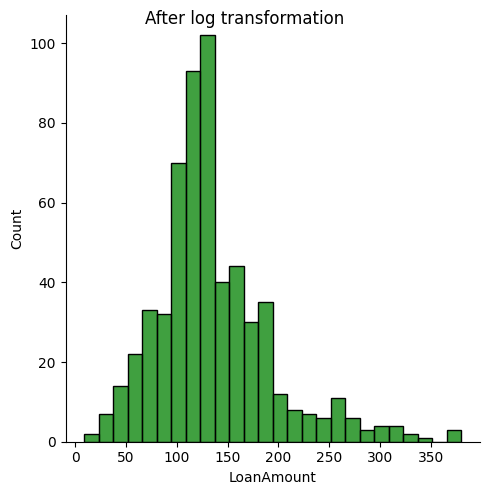

In [30]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome']=np.log1p(data['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.displot(data['ApplicantIncome'],color='green')

plt.subplot(1,3,2)
sns.displot(data['CoapplicantIncome'],color='green')

plt.subplot(1,3,3)
sns.displot(data['LoanAmount'],color='green')

plt.suptitle("After log transformation")
plt.show()

In [31]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [32]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [33]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

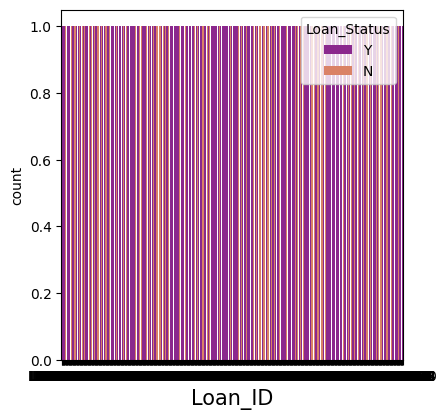

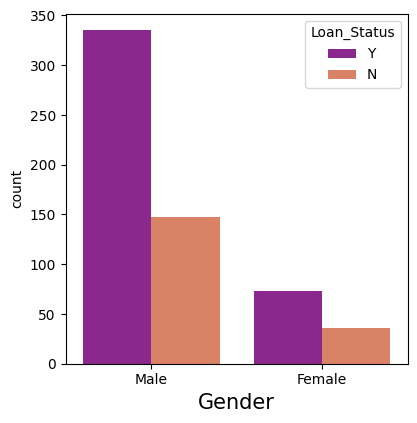

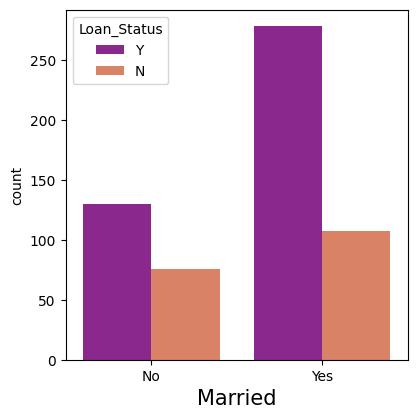

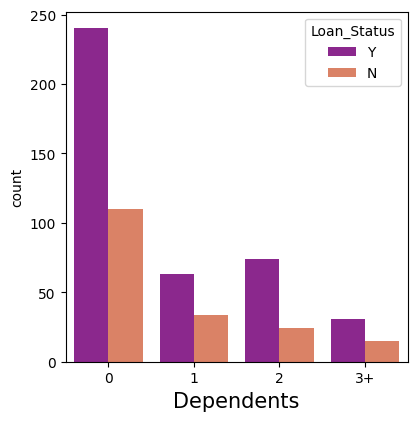

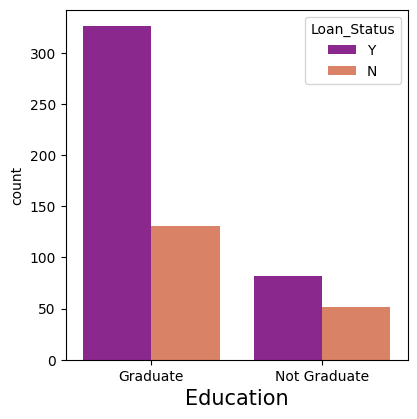

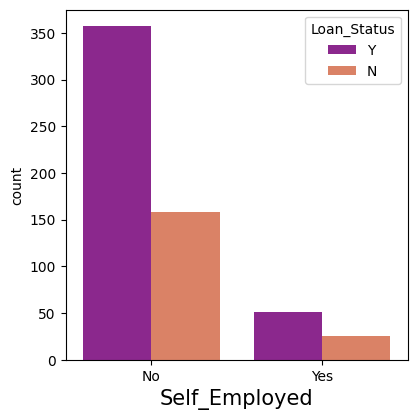

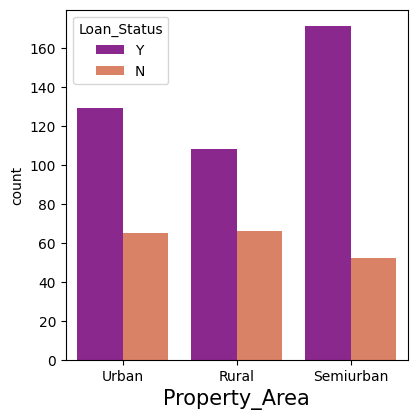

In [35]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue="Loan_Status",data=data,palette='plasma')
    plt.xlabel(i,fontsize=15)

PLT categorical data with target data

In [36]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
print(pd.crosstab(data['Loan_Status'],data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [38]:
print(pd.crosstab(data['Loan_Status'],data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [39]:
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [40]:
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


Data Preparation

In [41]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [42]:
data = data.drop(['Loan_ID'],axis=1)

In [43]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [44]:
data['Gender']= data['Gender'].replace(('Male','Female'),(1,0))
data['Married']= data['Married'].replace(('Yes','No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'),(1,0))

/var/folders/s0/r8kflntd409d9kqhz2msfv3r0000gn/T/ipykernel_56987/2933917270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']= data['Gender'].replace(('Male','Female'),(1,0))
/var/folders/s0/r8kflntd409d9kqhz2msfv3r0000gn/T/ipykernel_56987/2933917270.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Married']= data['Married'].replace(('Yes','No'),(1,0))
/var/folders/s0/r8kflntd409d9kqhz2msfv3r0000gn/T/ipykernel_56987/2933917270.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

In [45]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,2.160333,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,2.131810,2.118566,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,2.080237,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,2.061368,2.170880,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,2.163267,0.000000,141.0,360.0,1.0,Urban,Y


In [47]:
data['Self_Employed']=data['Self_Employed'].replace(("Yes","No"),(1,0))
data['Loan_Status']= data['Loan_Status'].replace(('Y','N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban','Rural','Semiurban'),(1,0,1))
data['Dependents']= data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1,))

/var/folders/s0/r8kflntd409d9kqhz2msfv3r0000gn/T/ipykernel_56987/2693196202.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Dependents']= data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1,))


In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,2.160333,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,2.131810,2.118566,128.0,360.0,1.0,0,0
2,1,1,0,1,1,2.080237,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2.061368,2.170880,120.0,360.0,1.0,1,1
4,1,0,0,1,0,2.163267,0.000000,141.0,360.0,1.0,1,1


In [49]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'],axis=1)

In [50]:
x.shape

(591, 11)

In [51]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [54]:
y.shape


(591,)

In [58]:
!pip install scikit-learn




[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [59]:
!pip install imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [60]:
from imblearn.over_sampling import SMOTE


In [62]:
x_resample , y_resample = SMOTE().fit_resample(x,y.values.ravel())

In [101]:
y.shape

(591,)

In [63]:
print(x_resample)
print(y_resample)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0         2.160333   
1         1        1           1          1              0         2.131810   
2         1        1           0          1              1         2.080237   
3         1        1           0          0              0         2.061368   
4         1        0           0          1              0         2.163267   
..      ...      ...         ...        ...            ...              ...   
811       1        1           0          1              0         2.139826   
812       0        0           0          0              0         2.100610   
813       1        1           0          1              0         2.119962   
814       1        0           0          1              0         2.138364   
815       1        1           0          1              0         2.153373   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [102]:
x_train , x_test, y_train , y_test = train_test_split(x_resample,y_resample,test_size=0.2,random_state=42)

In [103]:
x_train.shape

(652, 11)

In [104]:
y_train.shape

(652,)

Model building

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

/Users/priyanshiranawat/TensorFlow/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
y_pred= LR.predict(x_test)

In [114]:
from sklearn.metrics import accuracy_score

In [109]:
print("Training accuracy",LR.score(x_train,y_train))

Training accuracy 0.7714723926380368


In [110]:
print("Test accuracy",LR.score(x_test,y_test))

Test accuracy 0.8048780487804879


In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78        86
           1       0.72      0.96      0.82        78

    accuracy                           0.80       164
   macro avg       0.84      0.81      0.80       164
weighted avg       0.84      0.80      0.80       164



In [115]:
print("Our model accuracy is", accuracy_score(y_pred,y_test))

Our model accuracy is 0.8048780487804879


In [117]:
model_pred= np.array([[1,1,1,0,0,3924,1733,148.0,360,1,1]])

In [118]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


/Users/priyanshiranawat/TensorFlow/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
